In [5]:
!pip install ultralytics opencv-python-headless matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 899.0/899.0 kB 17.5 MB/s eta 0:00:00


In [6]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [7]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 74.3MB/s]


In [8]:
# roboflow에서 코드 다운로드(콜렙)


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="DB2eP4QK2992SSr6U187")
project = rf.workspace("bee-c1ac6").project("bee-dcyar")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [9]:
model.train(
    data='/content/bee-1/data.yaml',
    epochs=100,             #50   # 학습 에폭 수
    imgsz=640,                # 이미지 크기
    batch=13,                 # 배치 크기
    device=0
);

Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/bee-1/data.yaml, epochs=100, time=None, patience=100, batch=13, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 14.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 66.3MB/s]


AMP: checks passed ✅


train: Scanning /content/bee-1/train/labels... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:00<00:00, 1085.62it/s]

train: New cache created: /content/bee-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 14, len(boxes) = 470. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/bee-1/valid/labels... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<00:00, 870.08it/s]

val: New cache created: /content/bee-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005078125), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.94G      2.077      3.235        2.1         93        640: 100%|██████████| 8/8 [00:02<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.16it/s]

                   all         29        112     0.0125      0.973      0.227     0.0804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.87G      1.675      2.352      1.616         90        640: 100%|██████████| 8/8 [00:00<00:00,  9.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.61it/s]

                   all         29        112      0.901      0.326      0.744      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.93G      1.601      1.692      1.516         72        640: 100%|██████████| 8/8 [00:00<00:00,  9.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]

                   all         29        112     0.0129          1      0.836      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.91G      1.509      1.431      1.411         86        640: 100%|██████████| 8/8 [00:00<00:00,  9.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.94it/s]

                   all         29        112      0.966      0.255      0.698      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.87G      1.541        1.4      1.454         85        640: 100%|██████████| 8/8 [00:00<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.21it/s]

                   all         29        112      0.766      0.161      0.358      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.89G      1.508      1.265      1.411         92        640: 100%|██████████| 8/8 [00:00<00:00,  9.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.56it/s]

                   all         29        112      0.717      0.566      0.628      0.307



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.88G       1.49        1.3      1.463         57        640: 100%|██████████| 8/8 [00:00<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.15it/s]


                   all         29        112      0.648      0.598      0.669      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100       1.9G      1.468      1.261      1.416         89        640: 100%|██████████| 8/8 [00:00<00:00, 10.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.60it/s]

                   all         29        112      0.762      0.759      0.783       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.87G      1.478      1.249      1.424         89        640: 100%|██████████| 8/8 [00:00<00:00, 10.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.38it/s]


                   all         29        112      0.571      0.509      0.503      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.89G      1.504      1.248      1.452         78        640: 100%|██████████| 8/8 [00:00<00:00, 10.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.60it/s]

                   all         29        112      0.677      0.618      0.651      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      1.92G      1.476      1.183      1.404         76        640: 100%|██████████| 8/8 [00:00<00:00, 10.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.29it/s]


                   all         29        112      0.711      0.526      0.616      0.317

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.92G      1.471      1.175      1.401         75        640: 100%|██████████| 8/8 [00:00<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.89it/s]


                   all         29        112      0.513      0.446      0.437      0.228

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.87G      1.475      1.196      1.402         80        640: 100%|██████████| 8/8 [00:00<00:00, 11.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.47it/s]

                   all         29        112      0.223      0.611       0.21      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.89G      1.494      1.207      1.444         67        640: 100%|██████████| 8/8 [00:00<00:00, 11.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.79it/s]

                   all         29        112      0.516      0.661      0.605      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.87G      1.501      1.207      1.418         61        640: 100%|██████████| 8/8 [00:00<00:00, 11.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.03it/s]


                   all         29        112       0.51      0.777      0.603      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.89G      1.463      1.154      1.404        109        640: 100%|██████████| 8/8 [00:00<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.25it/s]

                   all         29        112      0.617      0.562      0.609      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      1.93G      1.444      1.122      1.413        119        640: 100%|██████████| 8/8 [00:00<00:00, 11.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.57it/s]


                   all         29        112      0.559      0.577      0.523      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.88G      1.497      1.115      1.466         45        640: 100%|██████████| 8/8 [00:00<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.12it/s]

                   all         29        112      0.795      0.795      0.835      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.88G      1.443      1.086      1.401         75        640: 100%|██████████| 8/8 [00:00<00:00, 10.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.08it/s]


                   all         29        112      0.749      0.857      0.812      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.87G      1.407      1.125      1.382        101        640: 100%|██████████| 8/8 [00:00<00:00, 10.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all         29        112      0.768      0.821      0.862      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.91G      1.348      1.065      1.371         97        640: 100%|██████████| 8/8 [00:00<00:00, 10.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all         29        112      0.802      0.857      0.882      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.86G      1.391      1.045      1.382         60        640: 100%|██████████| 8/8 [00:00<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.39it/s]


                   all         29        112      0.853      0.777      0.861      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.91G        1.4      1.011      1.378         89        640: 100%|██████████| 8/8 [00:00<00:00, 11.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.83it/s]

                   all         29        112      0.774      0.736      0.791      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.87G      1.411       1.04      1.388        120        640: 100%|██████████| 8/8 [00:00<00:00, 10.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.35it/s]


                   all         29        112      0.841      0.804      0.858      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.88G      1.336      1.018      1.321         83        640: 100%|██████████| 8/8 [00:00<00:00, 11.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.28it/s]

                   all         29        112      0.841      0.777      0.862      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.89G      1.364      1.038      1.361         82        640: 100%|██████████| 8/8 [00:00<00:00,  9.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.70it/s]

                   all         29        112      0.807      0.747      0.828      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.92G      1.296     0.9898      1.348        103        640: 100%|██████████| 8/8 [00:00<00:00, 10.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.99it/s]


                   all         29        112      0.837      0.777      0.882      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.91G       1.34     0.9821      1.341        102        640: 100%|██████████| 8/8 [00:00<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.26it/s]


                   all         29        112      0.869      0.832      0.893      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      1.89G      1.434      1.023       1.39         48        640: 100%|██████████| 8/8 [00:00<00:00, 10.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.74it/s]


                   all         29        112      0.893      0.848      0.919      0.489

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.87G      1.332      1.003      1.344         64        640: 100%|██████████| 8/8 [00:00<00:00, 11.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.09it/s]

                   all         29        112      0.926      0.848      0.941      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      1.89G      1.328     0.9716      1.329         75        640: 100%|██████████| 8/8 [00:00<00:00, 10.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.80it/s]


                   all         29        112      0.893      0.898       0.95      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.89G      1.233     0.9021      1.286         75        640: 100%|██████████| 8/8 [00:00<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.39it/s]


                   all         29        112      0.853      0.875       0.93      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.87G      1.347     0.9865      1.383         83        640: 100%|██████████| 8/8 [00:00<00:00,  9.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.77it/s]

                   all         29        112      0.887      0.911      0.946       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.91G      1.311     0.9652      1.301         48        640: 100%|██████████| 8/8 [00:00<00:00, 10.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.99it/s]

                   all         29        112      0.914      0.884      0.929      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100       1.9G      1.254     0.8571      1.283        132        640: 100%|██████████| 8/8 [00:00<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all         29        112      0.904      0.902      0.933      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.91G      1.224     0.8615      1.285         75        640: 100%|██████████| 8/8 [00:00<00:00, 11.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.27it/s]


                   all         29        112      0.905      0.946      0.947       0.55

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.87G      1.263     0.9115      1.341         68        640: 100%|██████████| 8/8 [00:00<00:00, 11.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.32it/s]

                   all         29        112      0.905      0.935      0.938      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.87G      1.237     0.8649        1.3         95        640: 100%|██████████| 8/8 [00:00<00:00, 10.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.14it/s]


                   all         29        112      0.894      0.929      0.948      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.91G      1.195     0.8566      1.275         73        640: 100%|██████████| 8/8 [00:00<00:00, 10.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.15it/s]

                   all         29        112      0.924      0.971       0.97      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.88G      1.246     0.8704      1.309         85        640: 100%|██████████| 8/8 [00:00<00:00, 11.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.89it/s]

                   all         29        112      0.943      0.946      0.969      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.89G      1.231     0.8399      1.268         73        640: 100%|██████████| 8/8 [00:00<00:00, 10.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.99it/s]

                   all         29        112      0.904      0.925      0.958       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.87G       1.24     0.8607      1.288        111        640: 100%|██████████| 8/8 [00:00<00:00, 11.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.93it/s]

                   all         29        112      0.808      0.941      0.946      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      1.85G      1.202     0.8268      1.264         77        640: 100%|██████████| 8/8 [00:00<00:00, 10.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.56it/s]

                   all         29        112      0.883      0.955      0.955      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      1.89G      1.188     0.8216      1.254        111        640: 100%|██████████| 8/8 [00:00<00:00,  9.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.02it/s]

                   all         29        112      0.863      0.902       0.92      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       1.9G       1.18      0.798      1.228         95        640: 100%|██████████| 8/8 [00:00<00:00, 10.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.51it/s]

                   all         29        112      0.858      0.917      0.928       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      1.91G      1.175     0.8117      1.244         92        640: 100%|██████████| 8/8 [00:00<00:00, 10.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.91it/s]

                   all         29        112       0.85      0.973      0.954      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       1.9G      1.241     0.8268      1.287        128        640: 100%|██████████| 8/8 [00:00<00:00, 11.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.78it/s]

                   all         29        112      0.866      0.979      0.957      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      1.86G      1.195     0.8591       1.27         95        640: 100%|██████████| 8/8 [00:00<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.18it/s]

                   all         29        112      0.906      0.982      0.966      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      1.88G      1.168     0.8276      1.267         81        640: 100%|██████████| 8/8 [00:00<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.34it/s]

                   all         29        112      0.907      0.964       0.98      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.85G      1.165     0.7851       1.25         83        640: 100%|██████████| 8/8 [00:00<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.69it/s]

                   all         29        112      0.949      0.929      0.982      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      1.91G      1.189     0.8253      1.288         83        640: 100%|██████████| 8/8 [00:00<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.73it/s]

                   all         29        112      0.938      0.952      0.973      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.88G      1.157     0.8174      1.271        106        640: 100%|██████████| 8/8 [00:00<00:00, 10.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.15it/s]

                   all         29        112      0.901      0.938      0.956      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      1.87G      1.171     0.8337      1.258        144        640: 100%|██████████| 8/8 [00:00<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.81it/s]

                   all         29        112      0.896      0.955      0.956      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      1.87G      1.134     0.8118      1.243         97        640: 100%|██████████| 8/8 [00:00<00:00, 10.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.34it/s]


                   all         29        112      0.914      0.955       0.97      0.564

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      1.87G      1.095     0.7781      1.229         81        640: 100%|██████████| 8/8 [00:00<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.55it/s]

                   all         29        112      0.878      0.973       0.97      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.86G      1.074     0.7204      1.178         91        640: 100%|██████████| 8/8 [00:00<00:00, 10.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]


                   all         29        112      0.898      0.946      0.961      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      1.86G      1.114     0.7461        1.2         90        640: 100%|██████████| 8/8 [00:00<00:00, 11.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.84it/s]

                   all         29        112      0.903      0.919      0.955      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      1.87G      1.122     0.7725      1.227         94        640: 100%|██████████| 8/8 [00:00<00:00, 11.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.79it/s]

                   all         29        112      0.909      0.929      0.955      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      1.88G      1.089     0.7768      1.211         86        640: 100%|██████████| 8/8 [00:00<00:00, 10.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.53it/s]

                   all         29        112      0.945      0.884      0.945      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.88G      1.063     0.7483      1.209         88        640: 100%|██████████| 8/8 [00:00<00:00, 11.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.83it/s]

                   all         29        112      0.933      0.875      0.936      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      1.85G      1.095     0.7826      1.213         58        640: 100%|██████████| 8/8 [00:00<00:00, 11.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.75it/s]

                   all         29        112      0.943      0.891      0.934      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.88G      1.104     0.7677      1.195        100        640: 100%|██████████| 8/8 [00:00<00:00, 10.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.73it/s]

                   all         29        112      0.916      0.911      0.943      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      1.91G      1.072     0.7375      1.185         76        640: 100%|██████████| 8/8 [00:00<00:00, 10.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.27it/s]

                   all         29        112      0.911      0.946      0.962      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.89G      1.021     0.6937       1.16        104        640: 100%|██████████| 8/8 [00:00<00:00, 10.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.15it/s]

                   all         29        112      0.921      0.938      0.968      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      1.86G      1.058     0.7156      1.175         85        640: 100%|██████████| 8/8 [00:00<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.92it/s]

                   all         29        112       0.91      0.955      0.971      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.88G      1.042     0.7123       1.17         92        640: 100%|██████████| 8/8 [00:00<00:00, 11.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.20it/s]

                   all         29        112      0.944      0.898      0.967      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      1.87G       1.05     0.7127      1.183         82        640: 100%|██████████| 8/8 [00:00<00:00, 11.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.28it/s]

                   all         29        112      0.902      0.946       0.97      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       1.9G      1.051     0.7127      1.149         84        640: 100%|██████████| 8/8 [00:00<00:00, 11.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.83it/s]

                   all         29        112      0.923      0.955      0.976      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      1.87G      1.015     0.6827      1.176        135        640: 100%|██████████| 8/8 [00:00<00:00, 10.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.20it/s]

                   all         29        112      0.908      0.965      0.978      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.88G       1.01     0.6744       1.15         84        640: 100%|██████████| 8/8 [00:00<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.07it/s]


                   all         29        112       0.91      0.989      0.978      0.581

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      1.87G      1.014     0.7264      1.179         81        640: 100%|██████████| 8/8 [00:00<00:00, 11.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.75it/s]

                   all         29        112      0.917      0.982      0.973      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      1.87G      0.999     0.7273      1.192         85        640: 100%|██████████| 8/8 [00:00<00:00, 11.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.13it/s]

                   all         29        112      0.921      0.973      0.973      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      1.88G     0.9946     0.7185      1.162         69        640: 100%|██████████| 8/8 [00:00<00:00, 10.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.71it/s]


                   all         29        112       0.92      0.973      0.976      0.595

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.87G      1.015     0.6993      1.149         76        640: 100%|██████████| 8/8 [00:00<00:00, 10.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.43it/s]

                   all         29        112       0.92      0.955      0.978      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100       1.9G       0.99      0.686      1.147         50        640: 100%|██████████| 8/8 [00:00<00:00, 10.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.86it/s]


                   all         29        112      0.922      0.954      0.977      0.571

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.85G     0.9787     0.6607      1.139         94        640: 100%|██████████| 8/8 [00:00<00:00, 10.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]

                   all         29        112      0.924      0.973      0.975      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      1.87G     0.9541     0.6653      1.129         59        640: 100%|██████████| 8/8 [00:00<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.18it/s]

                   all         29        112      0.931      0.971      0.972      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.88G      1.013     0.6999      1.155         70        640: 100%|██████████| 8/8 [00:00<00:00, 10.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.41it/s]

                   all         29        112      0.943      0.973      0.969      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      1.88G     0.9111     0.6399      1.094        119        640: 100%|██████████| 8/8 [00:00<00:00, 10.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all         29        112      0.956       0.98      0.974      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.87G     0.8826     0.6444      1.099         89        640: 100%|██████████| 8/8 [00:00<00:00, 11.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.89it/s]

                   all         29        112      0.955      0.982      0.977      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      1.85G     0.9019     0.6464      1.119         57        640: 100%|██████████| 8/8 [00:00<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.27it/s]

                   all         29        112      0.956      0.962      0.979      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.89G     0.9112     0.6338      1.108         74        640: 100%|██████████| 8/8 [00:00<00:00, 11.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.32it/s]

                   all         29        112      0.956      0.959      0.981      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      1.91G     0.8934     0.6131      1.093         78        640: 100%|██████████| 8/8 [00:00<00:00, 10.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.36it/s]


                   all         29        112      0.929      0.982      0.983      0.579

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      1.88G     0.8537     0.6048      1.094         81        640: 100%|██████████| 8/8 [00:00<00:00, 10.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.81it/s]

                   all         29        112      0.955      0.954      0.982      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      1.87G     0.9474      0.684      1.142         63        640: 100%|██████████| 8/8 [00:00<00:00, 10.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.24it/s]


                   all         29        112      0.946      0.944      0.978      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.88G     0.8915     0.6047      1.102         70        640: 100%|██████████| 8/8 [00:00<00:00, 10.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]


                   all         29        112      0.923      0.969       0.98      0.563

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      1.88G     0.9671      0.701      1.144         42        640: 100%|██████████| 8/8 [00:00<00:00, 10.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.58it/s]

                   all         29        112      0.923       0.97      0.979       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.88G     0.9126     0.6433      1.126         87        640: 100%|██████████| 8/8 [00:00<00:00, 11.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.20it/s]

                   all         29        112      0.901      0.991      0.979      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      1.87G     0.8736     0.6287      1.088         85        640: 100%|██████████| 8/8 [00:00<00:00, 11.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.42it/s]

                   all         29        112      0.916      0.964      0.973      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.91G     0.8803     0.6147      1.083         70        640: 100%|██████████| 8/8 [00:00<00:00, 11.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.49it/s]

                   all         29        112      0.921      0.973       0.97      0.563


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      1.87G     0.8646     0.6495      1.122         50        640: 100%|██████████| 8/8 [00:01<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]


                   all         29        112      0.918      0.996      0.971      0.552

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      1.88G     0.8116     0.5865      1.075         59        640: 100%|██████████| 8/8 [00:00<00:00, 11.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.82it/s]

                   all         29        112      0.918      0.996      0.972      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      1.87G      0.713     0.5068      1.009         53        640: 100%|██████████| 8/8 [00:00<00:00, 11.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.97it/s]

                   all         29        112      0.924          1      0.979      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.88G     0.7579     0.5329      1.032         51        640: 100%|██████████| 8/8 [00:00<00:00, 10.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.68it/s]

                   all         29        112      0.912      0.982      0.977      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      1.88G        0.8     0.5556      1.053         32        640: 100%|██████████| 8/8 [00:00<00:00, 11.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.66it/s]

                   all         29        112      0.925      0.955      0.977      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.85G     0.8226     0.5716      1.072         61        640: 100%|██████████| 8/8 [00:00<00:00, 10.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.56it/s]

                   all         29        112      0.938      0.973      0.981      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      1.88G     0.7967     0.5899      1.067         36        640: 100%|██████████| 8/8 [00:00<00:00, 10.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.77it/s]


                   all         29        112       0.94      0.964      0.981      0.562

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.87G     0.7185     0.4997      1.003         55        640: 100%|██████████| 8/8 [00:00<00:00, 10.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]

                   all         29        112      0.939      0.964      0.979      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      1.85G     0.7567     0.5154      1.029         52        640: 100%|██████████| 8/8 [00:00<00:00, 10.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.91it/s]

                   all         29        112      0.903      0.997      0.979      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      1.88G     0.7485     0.5378      1.045         56        640: 100%|██████████| 8/8 [00:00<00:00, 11.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.87it/s]

                   all         29        112       0.91      0.999      0.979      0.563



100 epochs completed in 0.045 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.82it/s]


                   all         29        112       0.92      0.973      0.976      0.595
Speed: 0.2ms preprocess, 0.9ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/train


In [ ]:
metrics = model.val()
print(metrics)

Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/People-Detection-8/valid/labels.cache... 1431 images, 61 backgrounds, 0 corrupt: 100%|██████████| 1431/1431 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/People-Detection-8/valid/images/GX010023_frame_00025_right_jpg.rf.3255febc597d78d5d6e4bde455ba7b2a.jpg: 23 duplicate labels removed
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 61, len(boxes) = 10660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 90/90 [00:23<00:00,  3.86it/s]


                   all       1431      10660      0.665      0.424      0.468      0.234
Speed: 0.3ms preprocess, 3.8ms inference, 0.0ms loss, 2.1ms postprocess per image
Results saved to runs/detect/train2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c9aed2f3970>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033

In [ ]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)
model.save('/content/drive/MyDrive/bee_detect.pt')

Mounted at /content/drive


In [ ]:
result = model('/content/People-Detection-8/test/images/0000540_jpg.rf.d1b964542ac8df27835f1348ebcac01a.jpg')


image 1/1 /content/People-Detection-8/test/images/0000540_jpg.rf.d1b964542ac8df27835f1348ebcac01a.jpg: 512x640 2 persons, 46.7ms
Speed: 4.3ms preprocess, 46.7ms inference, 2.7ms postprocess per image at shape (1, 3, 512, 640)


In [10]:
model.save('/content/drive/MyDrive/bee_detect.pt')


Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/bee-1/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]


                   all         29        112       0.92      0.973      0.976      0.594
Speed: 0.2ms preprocess, 1.5ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to runs/detect/val4
mAP50: 0.9756419855417842
mAP50-95: 0.5944374219230751
Precision: 0.9195585734163397
Recall: 0.9732142857142857


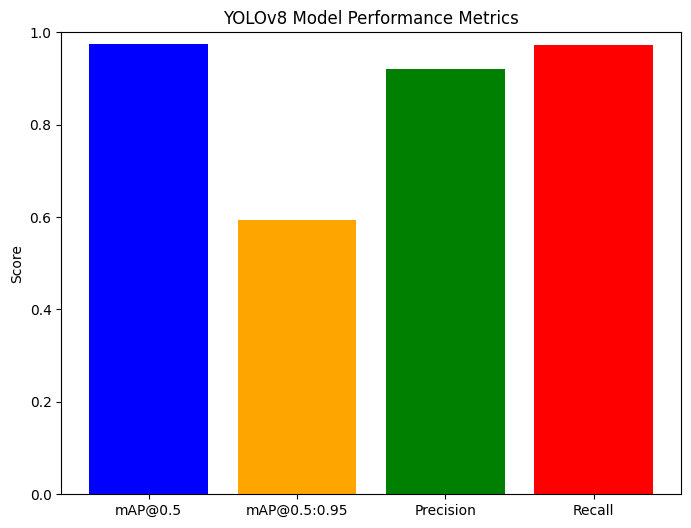

In [16]:
import matplotlib.pyplot as plt
from ultralytics import YOLO

# 1. 모델 로드
model = YOLO("/content/drive/MyDrive/bee_detect.pt")  # YOLOv8 모델 로드

# 2. 검증 데이터셋에 대해 평가 수행
results = model.val(data="/content/bee-1/data.yaml")  # 데이터셋 설정 파일 경로

# 3. 평가 결과에서 성능 지표 추출
metrics = results.results_dict

# 지표 데이터 확인
print("mAP50:", metrics['metrics/mAP50(B)'])
print("mAP50-95:", metrics['metrics/mAP50-95(B)'])
print("Precision:", metrics['metrics/precision(B)'])
print("Recall:", metrics['metrics/recall(B)'])

# 4. 성능 지표 그래프로 시각화
labels = ['mAP@0.5', 'mAP@0.5:0.95', 'Precision', 'Recall']
values = [
    metrics['metrics/mAP50(B)'],       # mAP@0.5
    metrics['metrics/mAP50-95(B)'],    # mAP@0.5:0.95
    metrics['metrics/precision(B)'],   # Precision
    metrics['metrics/recall(B)']       # Recall
]

# 막대 그래프 생성
plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange', 'green', 'red'])
plt.title('YOLOv8 Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)  # 성능 값은 0~1 사이
plt.show()


In [15]:
results = model.val(data="/content/bee-1/data.yaml")

# 결과 객체 출력
print(results)
print(type(results))
print(dir(results))


Ultralytics 8.3.50 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)


val: Scanning /content/bee-1/valid/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]


                   all         29        112       0.92      0.973      0.976      0.594
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79fb03753cd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03303